In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
#file_path = 'path/to/your/datasetclustering.xlsx'
#df = pd.read_excel(r'datasetclustering.xls')

df = pd.read_excel(r'/content/datasetuntuksmote.xlsx')
df



,no,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,multimedia?,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?,kategori lama bekerja,cluster
0,3,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,tidak,3,2,dosen,4,4,4,2-5,DTI
1,4,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,ya,5,5,swasta,4,3,5,5-10,DTI
2,6,pendidikan matematika,ya,pendidikan,pendidik,4,4,3,3,3,ya,2,2,dosen,3,3,3,2-5,DTI
3,9,pendidikan teknik informatika,ya,swasta,staf,5,4,4,4,4,tidak,4,4,swasta,4,4,4,5-10,DTI
4,10,sistem informasi,ya,teknologi informasi,staf,2,3,3,3,3,tidak,3,3,dosen,4,4,4,2-5,DTI
5,13,teknik informatika,ya,pendidikan,staf,6,3,2,3,3,tidak,4,4,swasta,4,4,4,5-10,DTI
6,14,pendidikan bahasa inggris,ya,pendidikan,direktur/kepala/manager,10,3,3,2,3,ya,3,3,dosen,4,4,4,10-15,DTI
7,16,ilmu komputer,tidak,tidak bekerja,tidak bekerja,0,2,2,3,2,tidak,2,2,swasta,3,3,3,0-2,DTI
8,19,teknik informatika,ya,pendidikan,direktur/kepala/manager,20,5,2,2,3,tidak,2,2,dosen,3,4,4,>15,DTI
9,21,sistem informasi,ya,pendidikan,direktur/kepala/manager,15,5,4,4,4,ya,3,3,dosen,4,4,5,>15,DTI


In [28]:
# prompt: hitung record tiap kelas pada atribut terakhir

# Group the data by the last attribute and count the number of records in each group
grouped_data = df.groupby(df.columns[-1]).size()

# Print the results
print(grouped_data)


cluster
BI     31
DTI    21
IA      3
dtype: int64


In [29]:
df.head()

,no,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,technopreneurship?,multimedia?,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?,kategori lama bekerja,cluster
0,3,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,tidak,3,2,dosen,4,4,4,2-5,DTI
1,4,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,ya,5,5,swasta,4,3,5,5-10,DTI
2,6,pendidikan matematika,ya,pendidikan,pendidik,4,4,3,3,3,ya,2,2,dosen,3,3,3,2-5,DTI
3,9,pendidikan teknik informatika,ya,swasta,staf,5,4,4,4,4,tidak,4,4,swasta,4,4,4,5-10,DTI
4,10,sistem informasi,ya,teknologi informasi,staf,2,3,3,3,3,tidak,3,3,dosen,4,4,4,2-5,DTI


In [30]:
le_jurusan = LabelEncoder()
le_technopreneur = LabelEncoder()
le_cluster = LabelEncoder()
df['jurusan_encode'] = le_jurusan.fit_transform(df['jurusan'])
df['technopreneurship_encode'] = le_technopreneur.fit_transform(df['technopreneurship?'])
df['cluster_encode'] = le_cluster.fit_transform(df['cluster'])

In [31]:
df.head()

,no,jurusan,bekerja?,bidang?,posisi?,lama bekerja?,pengalaman ketrampilan kerja?,pemrograman?,matematis statistik?,tata kelola SI/TI?,...,seni dalam multimedia?,tujuan karir?,analitis sistematis?,memimpin?,berpikir kreatif?,kategori lama bekerja,cluster,jurusan_encode,technopreneurship_encode,cluster_encode
0,3,teknik informatika,ya,pendidikan,direktur/kepala/manager,3,4,2,4,3,...,2,dosen,4,4,4,2-5,DTI,8,0,1
1,4,teknik informatika,ya,teknologi informasi,staf,8,5,1,1,2,...,5,swasta,4,3,5,5-10,DTI,8,1,1
2,6,pendidikan matematika,ya,pendidikan,pendidik,4,4,3,3,3,...,2,dosen,3,3,3,2-5,DTI,4,1,1
3,9,pendidikan teknik informatika,ya,swasta,staf,5,4,4,4,4,...,4,swasta,4,4,4,5-10,DTI,5,0,1
4,10,sistem informasi,ya,teknologi informasi,staf,2,3,3,3,3,...,3,dosen,4,4,4,2-5,DTI,6,0,1


In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [33]:
df2 = df.copy()

In [34]:
df2 = df2.drop(columns=['no', 'jurusan', 'bekerja?', 'bidang?', 'posisi?', 'lama bekerja?', 'pengalaman ketrampilan kerja?', 'tujuan karir?', 'kategori lama bekerja', 'jurusan_encode'])


In [35]:
# prompt: buang kolom pada df2 mulai dari kolom diagnosa, institusi, area, tipe, biaya_berobat, cluster

df2 = df2.drop(columns=['technopreneurship?', 'cluster'])


In [36]:
df2.head()

,pemrograman?,matematis statistik?,tata kelola SI/TI?,multimedia?,seni dalam multimedia?,analitis sistematis?,memimpin?,berpikir kreatif?,technopreneurship_encode,cluster_encode
0,2,4,3,3,2,4,4,4,0,1
1,1,1,2,5,5,4,3,5,1,1
2,3,3,3,2,2,3,3,3,1,1
3,4,4,4,4,4,4,4,4,0,1
4,3,3,3,3,3,4,4,4,0,1


In [37]:
# Memisahkan fitur (X) dan label (y)
x = df2[['pemrograman?', 'matematis statistik?', 'tata kelola SI/TI?', 'multimedia?', 'seni dalam multimedia?', 'analitis sistematis?', 'memimpin?', 'berpikir kreatif?', 'technopreneurship_encode']]
y = df2['cluster_encode']  # Mengasumsikan 'diagnosa' adalah label kelas

In [38]:
# Menampilkan distribusi kelas sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(Counter(y))

Distribusi kelas sebelum SMOTE:
Counter({0: 31, 1: 21, 2: 3})


In [39]:
smote = SMOTE(random_state=42, k_neighbors=2)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [40]:
# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(Counter(y_resampled))

Distribusi kelas setelah SMOTE:
Counter({1: 31, 0: 31, 2: 31})


In [41]:
# Membuat DataFrame baru dengan data yang telah diseimbangkan
df_resampled = pd.DataFrame(x_resampled, columns=x.columns)
df_resampled['cluster_encode'] = y_resampled
df_resampled.head()

,pemrograman?,matematis statistik?,tata kelola SI/TI?,multimedia?,seni dalam multimedia?,analitis sistematis?,memimpin?,berpikir kreatif?,technopreneurship_encode,cluster_encode
0,2,4,3,3,2,4,4,4,0,1
1,1,1,2,5,5,4,3,5,1,1
2,3,3,3,2,2,3,3,3,1,1
3,4,4,4,4,4,4,4,4,0,1
4,3,3,3,3,3,4,4,4,0,1


In [42]:
df_resampled

,pemrograman?,matematis statistik?,tata kelola SI/TI?,multimedia?,seni dalam multimedia?,analitis sistematis?,memimpin?,berpikir kreatif?,technopreneurship_encode,cluster_encode
0,2,4,3,3,2,4,4,4,0,1
1,1,1,2,5,5,4,3,5,1,1
2,3,3,3,2,2,3,3,3,1,1
3,4,4,4,4,4,4,4,4,0,1
4,3,3,3,3,3,4,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...
88,3,3,3,3,3,3,3,3,1,2
89,3,3,3,3,3,3,3,3,0,2
90,2,3,2,3,3,3,3,3,0,2
91,3,3,3,3,3,3,3,3,1,2


In [43]:
# Mengembalikan encoding ke bentuk asli
df_resampled['technopreneurship'] = le_technopreneur.inverse_transform(df_resampled['technopreneurship_encode'])
df_resampled['cluster'] = le_cluster.inverse_transform(df_resampled['cluster_encode'])

In [44]:
df_resampled

,pemrograman?,matematis statistik?,tata kelola SI/TI?,multimedia?,seni dalam multimedia?,analitis sistematis?,memimpin?,berpikir kreatif?,technopreneurship_encode,cluster_encode,technopreneurship,cluster
0,2,4,3,3,2,4,4,4,0,1,tidak,DTI
1,1,1,2,5,5,4,3,5,1,1,ya,DTI
2,3,3,3,2,2,3,3,3,1,1,ya,DTI
3,4,4,4,4,4,4,4,4,0,1,tidak,DTI
4,3,3,3,3,3,4,4,4,0,1,tidak,DTI
...,...,...,...,...,...,...,...,...,...,...,...,...
88,3,3,3,3,3,3,3,3,1,2,ya,IA
89,3,3,3,3,3,3,3,3,0,2,tidak,IA
90,2,3,2,3,3,3,3,3,0,2,tidak,IA
91,3,3,3,3,3,3,3,3,1,2,ya,IA


In [45]:
# prompt: hitung record tiap kelas pada atribut terakhir

# Group the data by the last attribute and count the number of records in each group
grouped_data = df_resampled.groupby(df_resampled.columns[-1]).size()

# Print the results
print(grouped_data)


cluster
BI     31
DTI    31
IA     31
dtype: int64


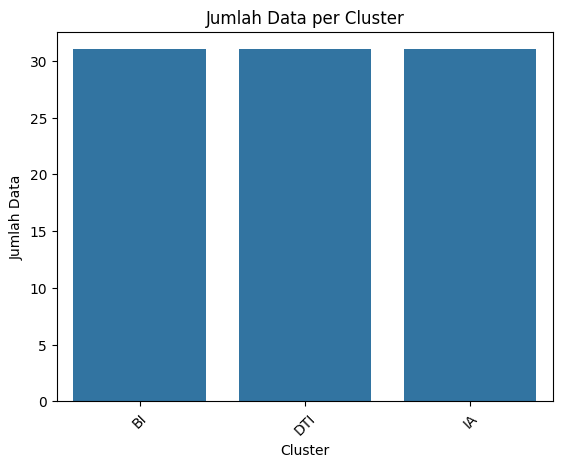

In [46]:
# prompt: buat visualisi plotbarnya dari kode baris ke 59

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the grouped data
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Add title and labels
plt.title('Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [47]:
from google.colab import files
df_resampled.to_excel('df_resampled.xlsx')
files.download('df_resampled.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>